# Swim Relay Assignment Problem
>Adapted from https://laurentlessard.com/teaching/cs524/slides/5%20-%20network%20flow%20problems.pdf
>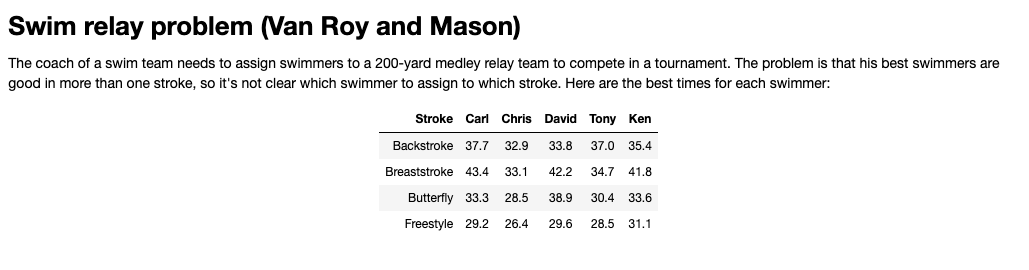

### Formulating the Model

The decision variable:
Our model has 20 variables for all 4 swims strokes and the 5 potential swimmers. These variables are represented by:

$$
  \begin{equation}
    x_{i j}=
    \begin{cases}
      1, & \text{if stroke i is completed by swimmer j}\\
      0, & \text{otherwise}
    \end{cases}
  \end{equation}
$$

Our parameter:
$$
\begin{equation*}
\ T_{ij} \text{ = Time for stroke i to be completed by swimmer j}\\
\end{equation*}
$$


Our first constraint is that each swimmer must be assigned to at most one stroke. This is represented as:

$$
\begin{equation}
\sum_{i=1}^4 x_{i j} \leq 1 \text{  for swimmer = j within [1,5]}
\end{equation}
$$


Our second constraint is that each stroke must be assigned to one swimmer. This is represented as:

$$
\begin{equation}
\sum_{j=1}^5 x_{i j} = 1 \text{  for stroke = i within [1,4]}
\end{equation}
$$


Our objective is to minimize:
$$
\begin{equation*}
\sum_{i=1}^{4}\sum_{j=1}^{5} x_{i j} * T_{ij}
\end{equation*}
$$

In [1]:
strokes = ["Backstroke", "Breaststroke", "Butterfly", "Freestyle"]
swimmers = ["Carl", "Chris", "David", "Tony", "Ken"]
times = [ 37.7, 32.9, 33.8, 37.0, 35.4, 43.4, 33.1, 42.2, 34.7, 41.8, 33.3, 28.5, 38.9, 30.4, 33.6, 29.2, 26.4, 29.6, 28.5, 31.1 ]
#array of times for stroke i by swimmer j

#create a list of tuples containing all possible strokes and swimers
combos = [(i,j) for i in strokes for j in swimmers]

#create a dictionary to hold the time for stroke i and swimmer j, where stroke i and swimmer j are keys and the time is value
time_dict = {}
dur_iter = 0
for (stroke, swimmer) in combos:
    time_dict[(stroke, swimmer)] = times[dur_iter]
    dur_iter = dur_iter + 1
print(time_dict)

{('Backstroke', 'Carl'): 37.7, ('Backstroke', 'Chris'): 32.9, ('Backstroke', 'David'): 33.8, ('Backstroke', 'Tony'): 37.0, ('Backstroke', 'Ken'): 35.4, ('Breaststroke', 'Carl'): 43.4, ('Breaststroke', 'Chris'): 33.1, ('Breaststroke', 'David'): 42.2, ('Breaststroke', 'Tony'): 34.7, ('Breaststroke', 'Ken'): 41.8, ('Butterfly', 'Carl'): 33.3, ('Butterfly', 'Chris'): 28.5, ('Butterfly', 'David'): 38.9, ('Butterfly', 'Tony'): 30.4, ('Butterfly', 'Ken'): 33.6, ('Freestyle', 'Carl'): 29.2, ('Freestyle', 'Chris'): 26.4, ('Freestyle', 'David'): 29.6, ('Freestyle', 'Tony'): 28.5, ('Freestyle', 'Ken'): 31.1}


In [2]:
#Import PuLP modeler functions
from pulp import *

In [3]:
#Create the 'prob' variable to contain the problem data
prob = LpProblem("Swim Relay", LpMinimize)

/Users/kathleencachel/opt/anaconda3/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [4]:
#Create the Xij variable
X = LpVariable.dicts("X", (strokes, swimmers),0,None,LpInteger)

In [5]:
#Add the objective function
prob += lpSum(X[strokes][swimmers]*time_dict[(strokes, swimmers)] for (strokes, swimmers) in combos)

In [6]:
#Add the constraints

#The supply constraint
for j in range(0,5):
    swimmer = swimmers[j]
    prob += lpSum(X[stroke][swimmer] for stroke in strokes) <= 1 
    
#The demand constraint
for i in range(0,4):
    stroke = strokes[i]
    prob += lpSum(X[stroke][swimmer]  for swimmer in swimmers) == 1

In [7]:
prob.writeLP("SwimRelay.lp")

[X_Backstroke_Carl,
 X_Backstroke_Chris,
 X_Backstroke_David,
 X_Backstroke_Ken,
 X_Backstroke_Tony,
 X_Breaststroke_Carl,
 X_Breaststroke_Chris,
 X_Breaststroke_David,
 X_Breaststroke_Ken,
 X_Breaststroke_Tony,
 X_Butterfly_Carl,
 X_Butterfly_Chris,
 X_Butterfly_David,
 X_Butterfly_Ken,
 X_Butterfly_Tony,
 X_Freestyle_Carl,
 X_Freestyle_Chris,
 X_Freestyle_David,
 X_Freestyle_Ken,
 X_Freestyle_Tony]

In [8]:
prob.solve()

1

In [9]:
#Print the variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

X_Backstroke_Carl = 0.0
X_Backstroke_Chris = 0.0
X_Backstroke_David = 1.0
X_Backstroke_Ken = 0.0
X_Backstroke_Tony = 0.0
X_Breaststroke_Carl = 0.0
X_Breaststroke_Chris = 0.0
X_Breaststroke_David = 0.0
X_Breaststroke_Ken = 0.0
X_Breaststroke_Tony = 1.0
X_Butterfly_Carl = 0.0
X_Butterfly_Chris = 1.0
X_Butterfly_David = 0.0
X_Butterfly_Ken = 0.0
X_Butterfly_Tony = 0.0
X_Freestyle_Carl = 1.0
X_Freestyle_Chris = 0.0
X_Freestyle_David = 0.0
X_Freestyle_Ken = 0.0
X_Freestyle_Tony = 0.0
